In [1]:
import warnings
warnings.filterwarnings("ignore")

防止在训练过程出现warning

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

路径包（读取文件）

numpy包（计算）

matplotlib（画图展示）

In [3]:
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa
import librosa.display
import seaborn as sns

读取声音文件

In [4]:
from keras import models, optimizers, layers
from keras.layers import Dense, TimeDistributed,Conv1D,Input, Flatten,Reshape ,MaxPooling1D, Dropout,Activation, LSTM,BatchNormalization
from keras.models import Sequential

Using TensorFlow backend.


keras包

In [6]:
train_audio_path = '/Users/houshinrin/Downloads/'
filename = 'speech.wav'
sample_rate, samples = wavfile.read(str(train_audio_path) + filename)

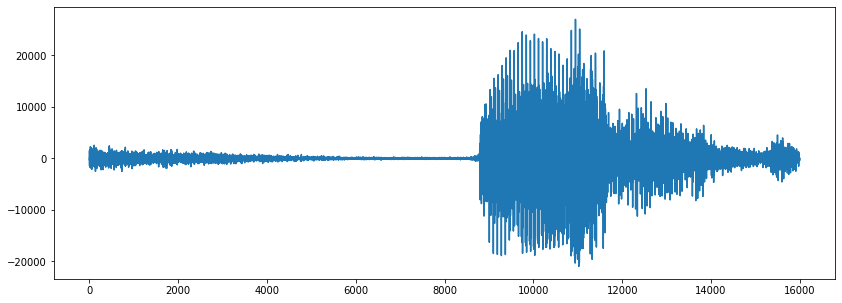

In [7]:
plt.figure(figsize=(14, 5))
plt.plot(samples)

In [9]:
steps = 7
steps_len = 4000
overlap = 2000
sam_slice = np.zeros((steps,steps_len))
for i in range(steps):
    sam_slice[i] = samples[overlap*i : overlap*i+steps_len]

定义间隔为2000，步长为4000的七步：(0，4000), (2000, 6000), (4000, 8000), (6000, 10000), (8000, 12000), (10000, 14000), (12000, 16000)。

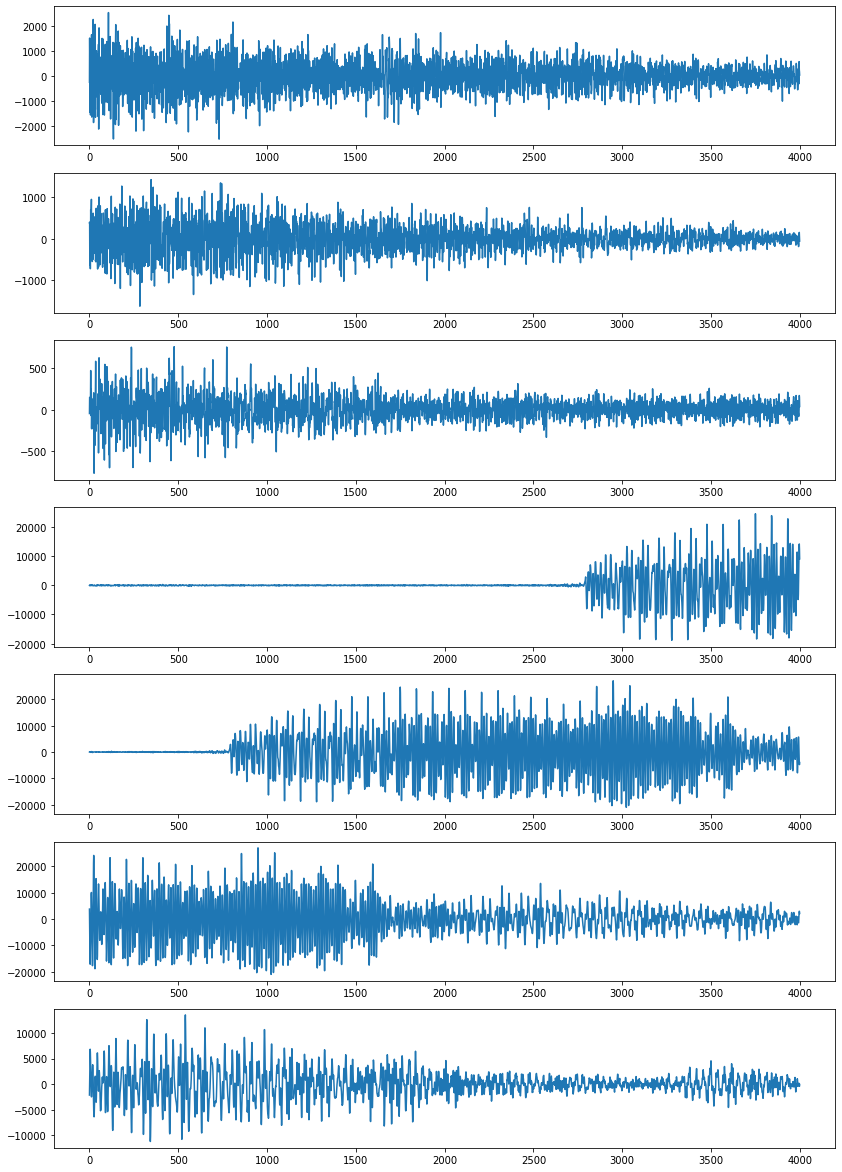

In [10]:
plt.figure(figsize=(14, 3*steps))

for i in range(steps):
    plt.subplot(steps, 1, i+1)
    plt.plot(sam_slice[i])

In [11]:
model = Sequential(name='speech')

In [12]:
model.add(Conv1D(filters = 64,kernel_size = (100),strides=10,padding='same',data_format='channels_last',input_shape=[4000, 1]))

In [13]:
model.add(BatchNormalization())
model.add(Activation('elu'))

In [14]:
model.add(MaxPooling1D(pool_size = 100, strides = 5, padding='same'))

In [15]:
model.add(Conv1D(filters=128, kernel_size = 100, strides=10,padding='same', activation='relu'))

In [16]:
model.add(BatchNormalization())
model.add(Activation('elu'))

正则化(语音信号的处理方法)（maybe）

In [17]:
model.add(MaxPooling1D(pool_size = 4, strides = 2, padding='same'))

In [18]:
model.add(LSTM(units=100)) 

In [19]:
model.add(Dense(units=10,activation='softmax'))

In [20]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='mse',metrics = ['accuracy'])

In [21]:
model.summary()

Model: "speech"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 400, 64)           6464      
_________________________________________________________________
batch_normalization_1 (Batch (None, 400, 64)           256       
_________________________________________________________________
activation_1 (Activation)    (None, 400, 64)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 80, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 8, 128)            819328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 128)            512       
_________________________________________________________________
activation_2 (Activation)    (None, 8, 128)            0    

可以根据以下的模型自己更改

def CNN_LSTM(input_shape, num_classes):

    model = Sequential(name='Emo1D')

    # LFLB1
    model.add(Conv1D(filters = 64,kernel_size = (3),strides=1,padding='same',data_format='channels_last',input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(MaxPooling1D(pool_size = 4, strides = 4))

    #LFLB2
    model.add(Conv1D(filters=64, kernel_size = 3, strides=1,padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(MaxPooling1D(pool_size = 4, strides = 4))

    #LFLB3
    model.add(Conv1D(filters=128, kernel_size = 3, strides=1,padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(MaxPooling1D(pool_size = 4, strides = 4))

    #LFLB4
    model.add(Conv1D(filters=128, kernel_size = 3, strides=1,padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(MaxPooling1D(pool_size = 4, strides = 4))

    #LSTM
    model.add(LSTM(units=args.num_fc)) 

    #FC
    model.add(Dense(units=num_classes,activation='softmax'))

    #Model compilation	
    opt = optimizers.SGD(lr = args.learning_rate, decay=args.decay, momentum=args.momentum, nesterov=True)
    model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['categorical_accuracy'])

    return model